In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from utils.paths import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
def get_scores_dataframe(dataset, dims, prefix=""):
    df = None

    for prueba in pruebas:
        path = os.path.join(scores_path, dataset, prueba, "%s%d.csv" % (prefix, dims))
        
        if os.path.exists(path):
            #print path
            if df is None:
                df = pd.read_csv(path, sep=',', header=0)
            else:
                new_df = pd.read_csv(path, sep=',', header=0)
                df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_columns)
                
    #se dejan disponibles solamente la tarea, el tipo de adaptacion y el error
    df_a = df[['Adaptacion', 'Tarea', 'Transfer loss']]
    
    # se manipula el dataframe para dejar la adaptacion como columna 
    df_a = df_a.groupby(['Tarea', 'Adaptacion'], as_index=True ).max()
    df_a = df_a.unstack(level=1)
    df_a.columns = df_a.columns.levels[1]
    
    return df_a

# Gráficos del dataset Amazon (3000 dimensiones)

### El dataset Amazon posee las siguientes características:

| Dominio     | Entrenamiento | Prueba |  % Negativos  | No Etiquetados |
|-------------|---------------|--------|---------------|----------------|
| books       |     1600      | 400    |      50%      |      4465      |
| dvd         |     1600      | 400    |      50%      |      5945      |
| electronics |     1600      | 400    |      50%      |      5681      |
| kitchen     |     1600      | 400    |      50%      |      3586      |


In [12]:
dims = 5000
df_amazon = get_scores_dataframe(datasets[0], dims, "me1_")
df_amazon

Adaptacion,Baseline,GFK
Tarea,,
b->d,5.00,30.75
b->e,10.75,35.75
b->k,10.00,37.25
d->b,11.75,32.50
d->e,12.50,33.25
d->k,8.50,36.00
e->b,11.75,27.50
e->d,11.75,31.25
e->k,2.50,45.00


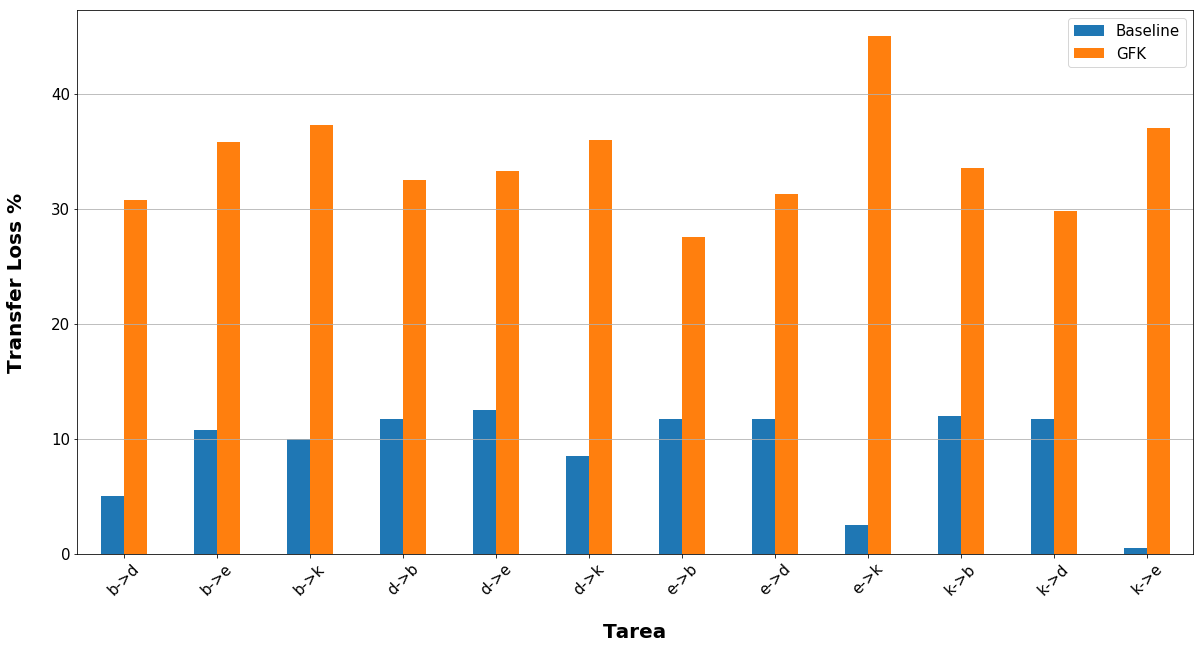

In [13]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = amazon_plot.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')

amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[0], "tloss_%d.png" % dims)
#plt.savefig(figure_path, bbox_inches='tight')

# Gráficos del dataset Amazon (3000 dimensiones)

In [4]:
dims = 1000
df_amazon = get_scores_dataframe(datasets[0], dims, "me1_")
df_amazon

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
b->d,5.00,0.50,5.25,5.75,2.00
b->e,10.75,7.75,8.50,11.50,5.00
b->k,10.00,3.00,10.50,9.75,0.50
d->b,11.75,10.25,8.75,7.50,2.75
d->e,12.50,3.50,8.50,13.00,5.25
d->k,8.50,1.25,4.00,7.50,3.50
e->b,11.75,9.75,6.50,14.25,7.25
e->d,11.75,9.00,5.25,5.00,5.75
e->k,2.50,-4.00,3.25,0.75,-1.00


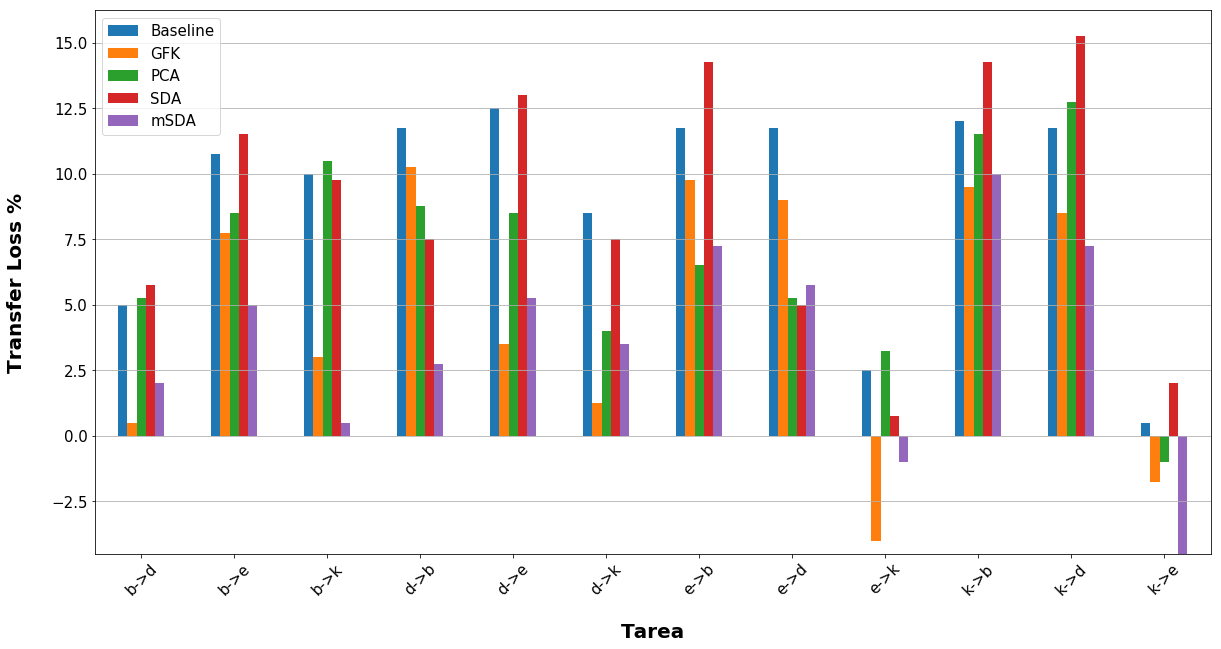

In [5]:
amazon_plot = df_amazon.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = amazon_plot.get_legend_handles_labels()

amazon_plot.legend(patches, labels, loc='best', fontsize=15)
amazon_plot.yaxis.grid(which='major')

amazon_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
amazon_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[0], "tloss_%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Gráficos del dataset Twitter (2000 dimensiones)


### El dataset Twitter posee las siguientes características:

| Dominio  | Entrenamiento | Prueba |  Total  |
|----------|---------------|--------|---------|
| thevoice |      518      |   130  |   648   |
| rio2016  |      380      |   96   |   476   |


In [6]:
dims = 2000
df_twitter = get_scores_dataframe(datasets[1], dims)
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
r->t,5.384615,11.538462,6.923077,19.230769,10.769231
t->r,2.083333,13.541667,2.083333,20.833333,0.000000


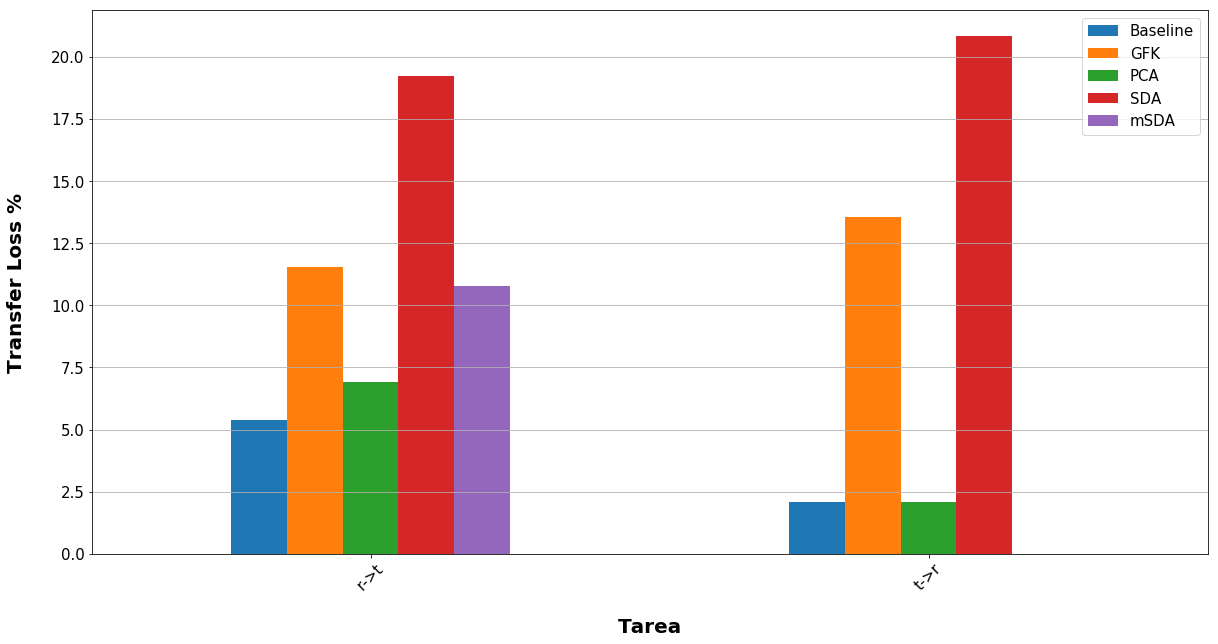

In [7]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[1], "%d.png" % dims)
plt.savefig(figure_path, bbox_inches='tight')

# Twitter (1000 dimensiones)

In [8]:
dims = 1000
df_twitter = get_scores_dataframe(datasets[1], dims)
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
r->t,10.000000,17.692308,10.769231,24.615385,9.230769
t->r,1.041667,16.666667,5.208333,17.708333,2.083333


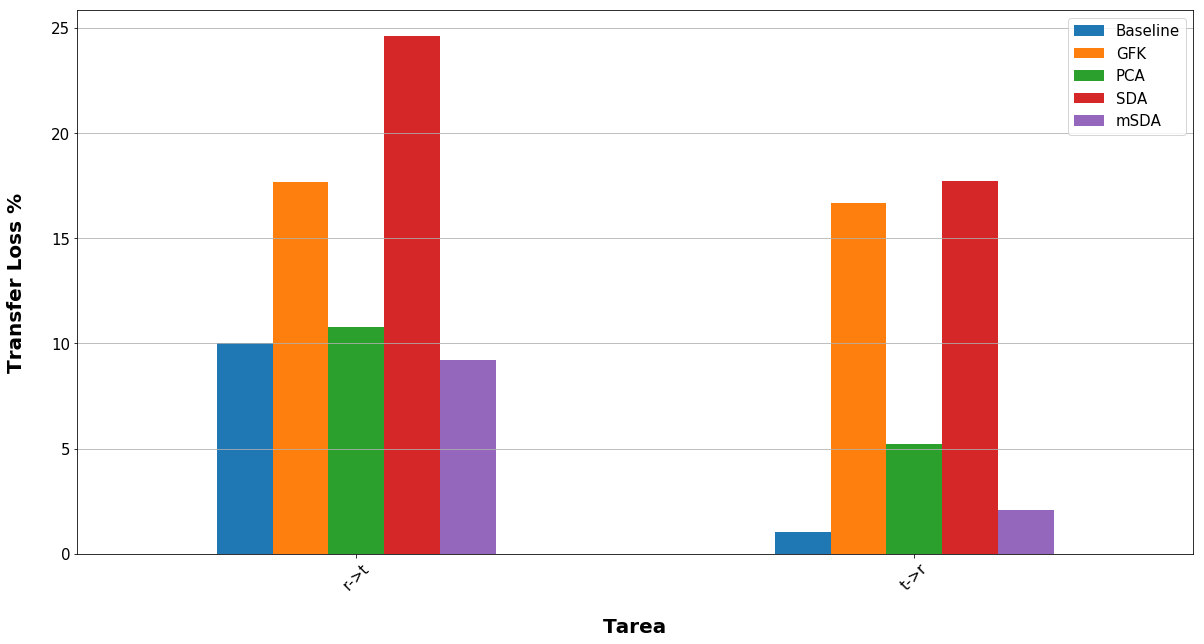

In [9]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[1], "%d.png" % dims)
#plt.savefig(figure_path, bbox_inches='tight')

# Twitter (500 dimensiones)

In [4]:
dims = 500
df_twitter = get_scores_dataframe(datasets[1], dims)
df_twitter

Adaptacion,Baseline,GFK,PCA,SDA,mSDA
Tarea,,,,,
r->t,6.153846,11.538462,13.076923,16.923077,6.923077
t->r,-1.041667,10.416667,0.000000,10.416667,2.083333


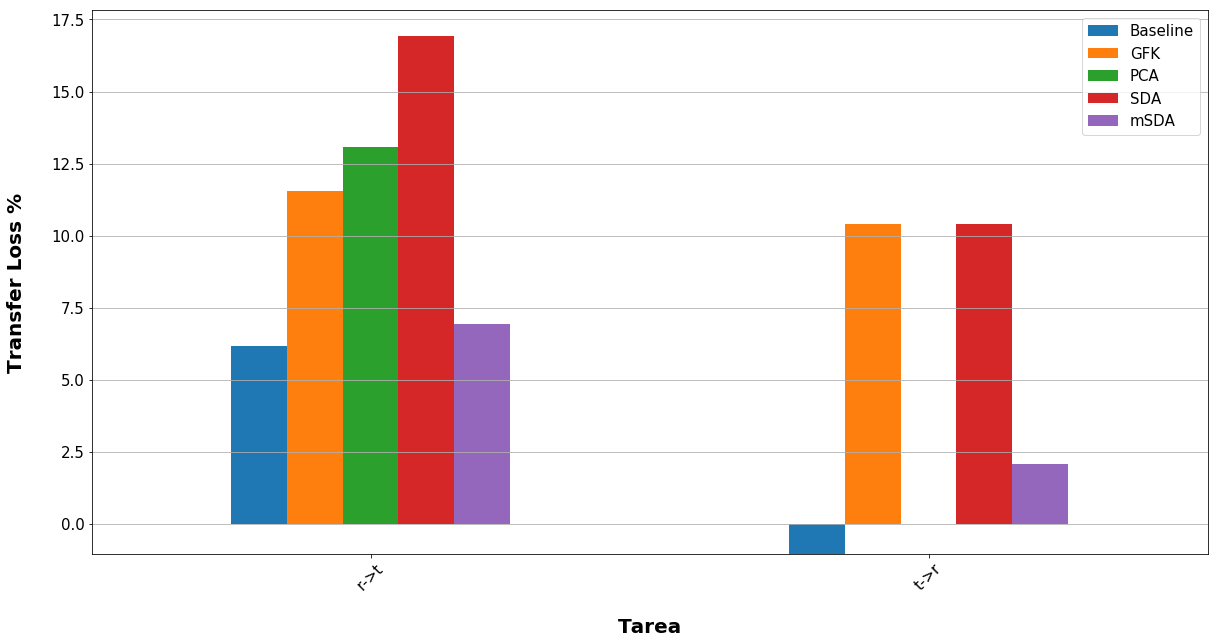

In [5]:
twitter_plot = df_twitter.plot(kind='bar', figsize=(20,10), rot=45, fontsize=15, legend=False)
patches, labels = twitter_plot.get_legend_handles_labels()

twitter_plot.legend(patches, labels, loc='best', fontsize=15)
twitter_plot.yaxis.grid(which='major')

twitter_plot.set_ylabel("Transfer Loss %", labelpad=25,fontsize=20, weight='bold')
twitter_plot.set_xlabel("Tarea", labelpad=25,fontsize=20, weight='bold')

figure_path = os.path.join(graficos_path, datasets[1], "%d.png" % dims)
#plt.savefig(figure_path, bbox_inches='tight')

# Gráficos de Tiempo con el dataset Amazon (3000 dimensiones)

In [3]:
def get_times_dataframe():
    df = None
    
    for prueba in pruebas:
        if prueba is not "baseline":
            file_path = os.path.join(times_path, "%s.csv" % prueba)
            
            if os.path.exists(file_path):
                if df is None:
                    df = pd.read_csv(file_path, sep=',', header=0)
                else:
                    new_df = pd.read_csv(file_path, sep=',', header=0)
                    df = df.append(new_df, ignore_index=True)
    
    if df is None:
        return pd.DataFrame(columns=dataframe_time_columns)
    
    return df[dataframe_time_columns]

In [4]:
df_tiempos = get_times_dataframe()

In [5]:
df_tiempos = df_tiempos.sort_values('Tiempo').reset_index()[dataframe_time_columns]
df_tiempos.index = df_tiempos['Adaptacion']

In [6]:
df_tiempos

,Adaptacion,Tiempo
Adaptacion,,
GFK (n_dims=10),GFK (n_dims=10),0.106289
GFK (n_dims=50),GFK (n_dims=50),0.109967
GFK (n_dims=100),GFK (n_dims=100),0.118441
PCA (n=750),PCA (n=750),0.360805
PCA (n=1500),PCA (n=1500),0.751653
mSDA (l=1),mSDA (l=1),2.368892
"SDA (l=1, epochs=25)","SDA (l=1, epochs=25)",7.076742
mSDA (l=3),mSDA (l=3),7.107120
mSDA (l=5),mSDA (l=5),11.863423


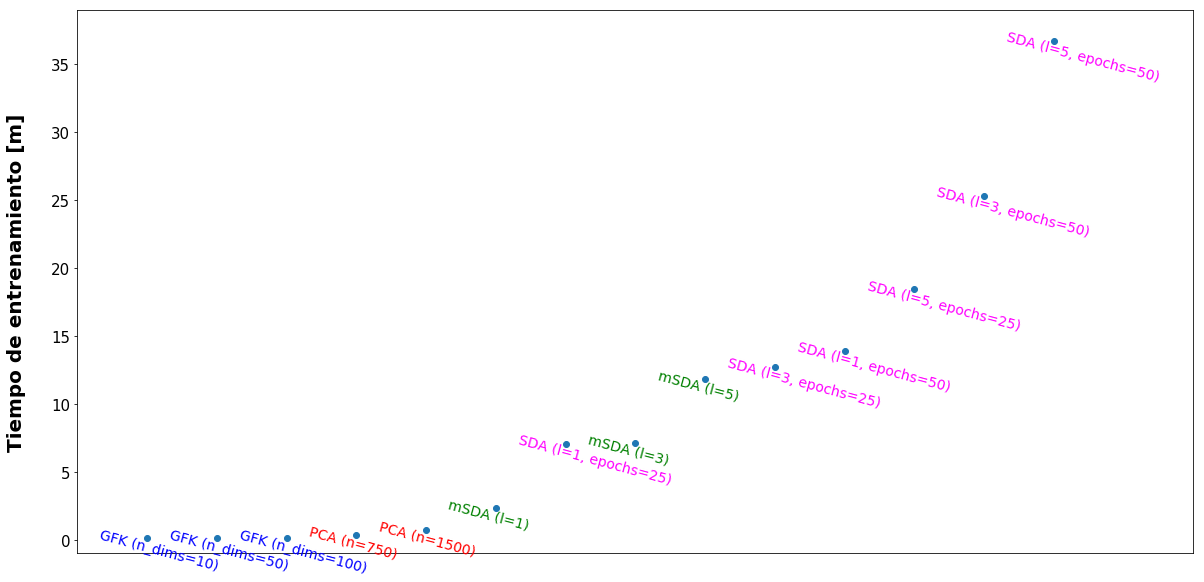

In [37]:
colores = {
    "GFK": 'blue',
    'PCA': 'red',
    'mSDA': 'green',
    'SDA': 'magenta',
}

time_plot = df_tiempos.plot(style='o', figsize=(20,10), rot=65, fontsize=15, legend=False,
                            xlim=(-1, 15), ylim=(-1, 39))
time_plot.set_ylabel("Tiempo de entrenamiento [m]", labelpad=25,fontsize=20, weight='bold')
time_axes = time_plot.axes

xaxis = time_axes.xaxis
xaxis.set_visible(False)


time_fig = time_plot.figure
ax = time_fig.add_subplot(111)

for i in xrange(df_tiempos.shape[0]):
    i
    y = df_tiempos['Tiempo'][i]
    text = df_tiempos['Adaptacion'][i]
    color = colores[text.split(" ")[0]]
    #ax.annotate(text, xy=(i, y), xytext=(i-0.5, y+0.003))
    ax.text(i-0.7, y+0.004, text, fontsize=14, rotation=-15, color=color)

save_path = os.path.join(graficos_path, datasets[0], "tiempos_%d.png" % dimensions[datasets[0]])
plt.savefig(save_path, bbox_inches='tight')